In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
!pip install openpyxl
print("openpyxl installed")

openpyxl installed


## About the data: 
#### The data used for our project is from the Immigration, Refugees and Citizenship of Canada (IRCC).
Facts and Figures 2017: Immigration Overview - Permanent Residents - 15. Canada - Permanent residents by source country, 2008 - 2017
Link: https://open.canada.ca/data/en/dataset/082f05ba-e333-4132-ba42-72828d95200b/resource/c2cc1d39-9a60-488f-a245-83f4edf0c229

In [3]:
df_can = pd.read_csv("https://www.ircc.canada.ca/opendata-donneesouvertes/data/IRCC_FF_PR_2017_15_CSV.csv", 
                     encoding='latin-1', skiprows=5)
df_can.head()

,Year/année,Source Country,Pays d'origine,Number/Nombre
0,2008,India,Inde,28255
1,2008,Philippines,Philippines,24883
2,2008,"China, People's Republic of","Chine, République populaire de",30030
3,2008,Syria,Syrie,919
4,2008,United States of America,États-Unis d'Amérique,10186


In [4]:
# The column source country is duplicated with a French column since Canada is Bilingual, 
# let's drop that and do a bit of cleaning
df_can.drop("Pays d'origine", axis=1, inplace=True)
df_can.rename(columns={"Year/année":"year", "Source Country":"source country", "Number/Nombre":"number"}, inplace=True)
df_can.head()

,year,source country,number
0,2008,India,28255
1,2008,Philippines,24883
2,2008,"China, People's Republic of",30030
3,2008,Syria,919
4,2008,United States of America,10186


In [5]:
df_can.shape

(2120, 3)

In [6]:
# Our table is too long to work with, let's make it wider (years) with the countries as index
df_2017 = df_can.pivot_table(index='source country', columns='year', values='number')

In [10]:
df_2017.head(50)

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
source country,,,,,,,,,,
Afghanistan,2110,1745,1758,2203,2635,2003,1490,2587,2635,3438
Albania,560,715,560,539,619,603,519,574,513,644
Algeria,4005,5390,4751,4325,3762,4325,3653,2835,2821,2635
Andorra,0,0,0,0,1,1,0,2,0,0
Angola,76,62,61,39,70,45,21,30,33,47
Antigua and Barbuda,32,38,27,37,50,25,50,51,46,83
Argentina,540,467,459,278,263,282,214,237,259,235
Armenia,205,267,252,236,258,208,205,302,352,254
Australia,1018,1018,933,849,982,1120,1295,1414,1694,1863


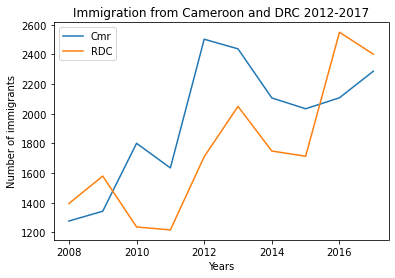

In [36]:
# Plotting a line of Immigrants from Cameroon
df_2017.loc['Cameroon, Federal Republic of',].plot(kind='line' , label="Cmr")
df_2017.loc['Congo, Democratic Republic of the',].plot(kind='line', label="RDC")
plt.title('Immigration from Cameroon and DRC 2012-2017')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.legend(loc="upper left")
plt.show()

In [19]:
# Now let's compare the number of immigrants from India and China.
df_CI = df_2017.loc[['India','Chad, Republic of']]
df_CI

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
source country,,,,,,,,,,
India,28255,29448,34225,27486,30914,33078,38335,39526,39792,51653
"Chad, Republic of",95,87,98,79,97,86,82,87,101,121
